In [13]:
import numpy as np 
import cv2

img = cv2.imread("doc_wood.jpg",1)

#resize image
img = cv2.resize(img,(600,800))

#convert image to grayscale
grey = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

#blurr image to smooth 
blurr = cv2.GaussianBlur(grey, (5,5),0)

#finding edges 
edge = cv2.Canny(blurr, 0, 50)  

In [14]:
#apadtive threshold and canny gave similar final output 
#threshold = cv2.adaptiveThreshold(blurr ,255,cv2.ADAPTIVE_THRESH_MEAN_C,cv2.THRESH_BINARY,11,2)
#find contours in thresholded image and sort them according to decreasing area
contours,threshold = cv2.findContours(edge, cv2.RETR_LIST, cv2.CHAIN_APPROX_SIMPLE)
contours = sorted(contours, key=cv2.contourArea, reverse= True)




In [15]:
#contour approximation 
for i in contours:
	elip =  cv2.arcLength(i, True)
	approx = cv2.approxPolyDP(i,0.08*elip, True)

	if len(approx) == 4 : 
		doc = approx 
		break

In [16]:
doc[0]

array([[75, 59]], dtype=int32)

In [17]:
#draw contours 
cv2.drawContours(img, [doc], -1, (0, 255, 0), 2)

#reshape to avoid errors ahead
doc=doc.reshape((4,2))

#create a new array and initialize 
new_doc = np.zeros((4,2), dtype="float32")

Sum = doc.sum(axis = 1)
new_doc[0] = doc[np.argmin(Sum)]
new_doc[2] = doc[np.argmax(Sum)]

Diff = np.diff(doc, axis=1)
new_doc[1] = doc[np.argmin(Diff)]
new_doc[3] = doc[np.argmax(Diff)]

(tl,tr,br,bl) = new_doc

#find distance between points and get max 
dist1 = np.linalg.norm(br-bl)
dist2 = np.linalg.norm(tr-tl)

maxLen = max(int(dist1),int(dist2))

dist3 = np.linalg.norm(tr-br)
dist4 = np.linalg.norm(tl-bl)

maxHeight = max(int(dist3), int(dist4))

dst = np.array([[0,0],[maxLen-1, 0],[maxLen-1, maxHeight-1], [0, maxHeight-1]], dtype="float32")

N = cv2.getPerspectiveTransform(new_doc, dst)
warp = cv2.warpPerspective(img, N, (maxLen, maxHeight))

img2 = cv2.cvtColor(warp, cv2.COLOR_BGR2GRAY)
img2 = cv2.resize(img2,(600,800))

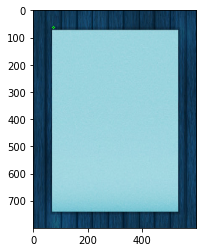

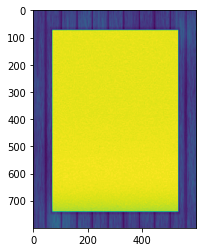

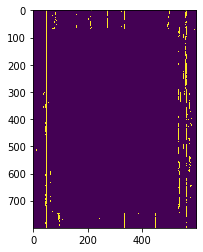

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


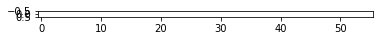

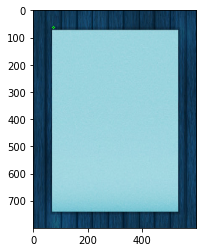

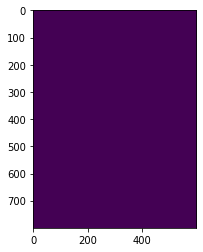

In [18]:
import matplotlib.pyplot as plt
# cv2.imshow("Original.jpg",img)
# cv2.imshow("Grey.jpg",grey)
# cv2.imshow("Gaussian_Blur.jpb",blurr)
# cv2.imshow("Canny_Edge.jpg",edge)
# #cv2.imshow("Threshold.jpg",threshold)
# cv2.imshow("Contours.jpg", img)
# cv2.imshow("Scanned.jpg", img2)


plt.imshow(img)
plt.show()
plt.imshow(blurr)
plt.show()
plt.imshow(edge)
plt.show()
plt.imshow(threshold)
plt.show()
plt.imshow(img)
plt.show()
plt.imshow(img2)
plt.show()